Best parameters: {'regressor__alpha': 10.0}
Best score (MSE): 57366.86333391785
Mean squared error: 60720.64
Coefficient of determination: -0.07
Mean Absolute Percentage Error (MAPE): 0.11%


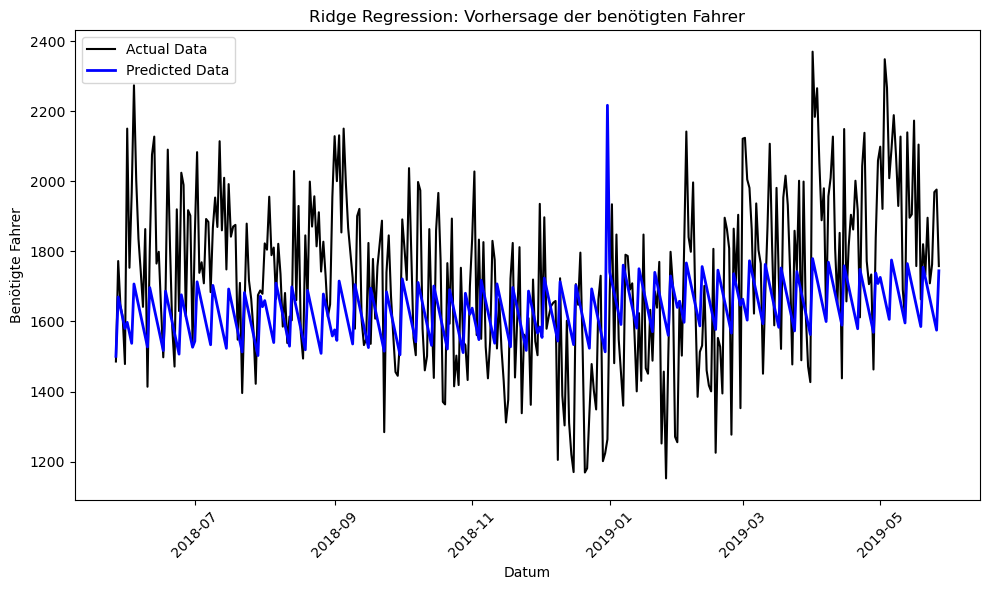

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_percentage_error as sklearn_mape

# Daten einlesen
test = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/test_data.csv')
train = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv')

# Datums-Spalte in Datetime-Format umwandeln
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

# Auswahl der Features
features = ['weekday', 'calendarweek', 'month', 'year'] # Hier kannst du beliebige Features hinzufügen

# Fehlende Werte im DataFrame behandeln
train = train.fillna(0)
test = test.fillna(0)

# Extrahiere die Werte für das Training und Testen
X_train = train[features].values
X_test = test[features].values

# Zielvariable (Anzahl der Anrufe)
y_train = train['Fahrer_benötigt'].values
y_test = test['Fahrer_benötigt'].values

# Pipeline mit Standardisierung und Ridge Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])

# Hyperparameter-Tuning mit Grid Search
param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0]  # Beispielwerte für die Regularisierungsstärke
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Beste Parameter und Modellbewertung
print("Best parameters:", grid_search.best_params_)
print("Best score (MSE):", -grid_search.best_score_)

# Vorhersagen mit dem besten Modell
y_pred = grid_search.predict(X_test)

# Evaluation
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# MAPE berechnen
mape = sklearn_mape(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Plot der Ergebnisse
plt.figure(figsize=(10, 6))
plt.plot(test['date'], y_test, color="black", label="Actual Data")
plt.plot(test['date'], y_pred, color="blue", linewidth=2, label="Predicted Data")

plt.xlabel('Datum')
plt.ylabel('Benötigte Fahrer')
plt.title('Ridge Regression: Vorhersage der benötigten Fahrer')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ergebnisse speichern
prediction_df = pd.DataFrame({
    'date': test['date'],  # Datum aus dem Testdatensatz
    'Ridge_Regression': y_pred  # Vorhersagen des Modells
})

prediction_df.to_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/prediction_Ridge_Regression_calls.csv', index=False)


In [15]:
from sklearn.linear_model import LassoCV

# Erstelle und trainiere das Lasso-Modell mit Kreuzvalidierung
lasso = LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)
lasso.fit(X_train, y_train)

# Zeige die Koeffizienten der Features
print("Lasso coefficients: ", lasso.coef_)

# Wähle Features mit nicht-null Koeffizienten aus
selected_features = np.array(features)[lasso.coef_ != 0]
print("Selected features: ", selected_features)

# Wende die Auswahl auf die Trainings- und Testdaten an
X_train_selected = X_train[:, lasso.coef_ != 0]
X_test_selected = X_test[:, lasso.coef_ != 0]

# Trainiere das Modell mit den ausgewählten Features
model = Ridge_Regression()
model.fit(X_train_selected, y_train)

# Vorhersagen und Evaluation
y_pred = model.predict(X_test_selected)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Lasso coefficients:  [-2.71243348e+01  0.00000000e+00 -1.11038224e+01  3.53385702e+01
 -0.00000000e+00  0.00000000e+00  4.72065841e+01  6.36079913e+01
  4.86237950e-03  3.29765924e-02  5.13176071e-02]
Selected features:  ['weekday' 'calendarweek' 'month' 'season' 'year' 'lag_49_calls'
 'lag_365_calls' 'average7days45lag_calls']


/Users/frederic/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4307.133396495134, tolerance: 3296.43372545628
  model = cd_fast.enet_coordinate_descent_gram(
/Users/frederic/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106908.90459103882, tolerance: 3296.43372545628
  model = cd_fast.enet_coordinate_descent_gram(
/Users/frederic/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150747.09846498072, tolerance: 3296.43372545628
  model = cd_fast.enet_coordinate_descent_gram(


NameError: name 'Ridge_Regression' is not defined

                                     SARIMAX Results                                     
Dep. Variable:                   Fahrer_benötigt   No. Observations:                  786
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -5218.483
Date:                           Tue, 13 Aug 2024   AIC                          10446.965
Time:                                   19:32:40   BIC                          10470.249
Sample:                               04-01-2016   HQIC                         10455.921
                                    - 05-26-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1563      0.040      3.932      0.000       0.078       0.234
ma.L1         -0.9046      0.019    -47.331

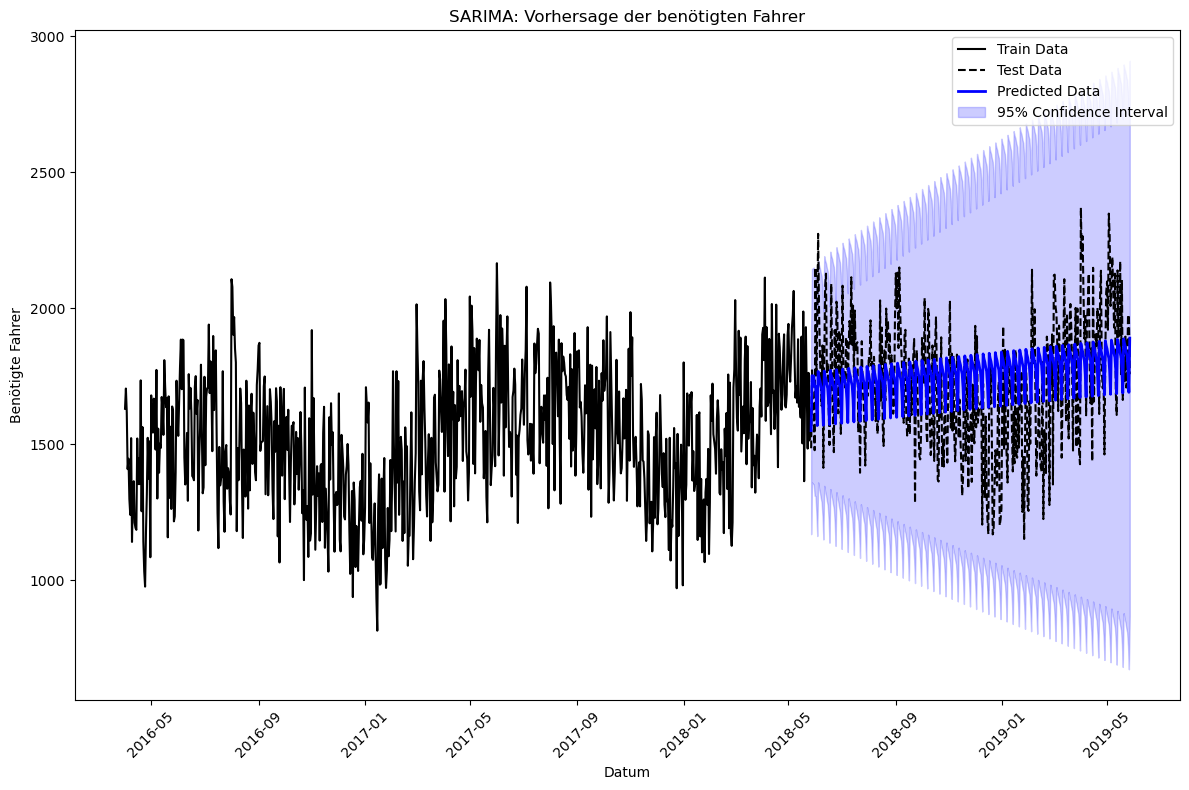

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error as sklearn_mape
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Daten einlesen
test = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/test_data.csv')
train = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv')

# Datums-Spalte in Datetime-Format umwandeln
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

# Setze 'date' als Index und stelle die Frequenz ein
train.set_index('date', inplace=True)
test.set_index('date', inplace=True)

# Stelle sicher, dass die Zeitreihe eine feste Frequenz hat
train = train.asfreq('D')  # 'D' für tägliche Frequenz
test = test.asfreq('D')    # 'D' für tägliche Frequenz

# Zielvariable (Anzahl der benötigten Fahrer)
y_train = train['Fahrer_benötigt']
y_test = test['Fahrer_benötigt']

# SARIMA Modell definieren
sarima_model = SARIMAX(
    y_train,
    order=(1, 1, 1),         # ARIMA-Komponenten (p, d, q)
    seasonal_order=(1, 1, 1, 7)  # Saisonale Komponenten (P, D, Q, m)
)

# Modell fitten
sarima_result = sarima_model.fit(disp=False)

# Modellzusammenfassung anzeigen
print(sarima_result.summary())

# Vorhersagen auf den Testdaten
y_pred = sarima_result.get_forecast(steps=len(y_test))
y_pred_mean = y_pred.predicted_mean
y_pred_conf_int = y_pred.conf_int()

# Evaluation
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_mean))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_mean))

# MAPE berechnen
mape = sklearn_mape(y_test, y_pred_mean)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Plot der Ergebnisse
plt.figure(figsize=(12, 8))
plt.plot(train.index, y_train, color="black", label="Train Data")
plt.plot(test.index, y_test, color="black", linestyle='--', label="Test Data")
plt.plot(test.index, y_pred_mean, color="blue", linewidth=2, label="Predicted Data")
plt.fill_between(test.index, y_pred_conf_int.iloc[:, 0], y_pred_conf_int.iloc[:, 1], color='blue', alpha=0.2, label='95% Confidence Interval')

plt.xlabel('Datum')
plt.ylabel('Benötigte Fahrer')
plt.title('SARIMA: Vorhersage der benötigten Fahrer')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ergebnisse speichern
prediction_df = pd.DataFrame({
    'date': test.index,  # Datum aus dem Testdatensatz
    'SARIMA': y_pred_mean  # Vorhersagen des Modells
})

prediction_df.to_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/prediction_SARIMA_calls.csv', index=False)


/Users/frederic/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean squared error: 47893.21
Coefficient of determination: 0.16
Mean Absolute Percentage Error (MAPE): 0.11%


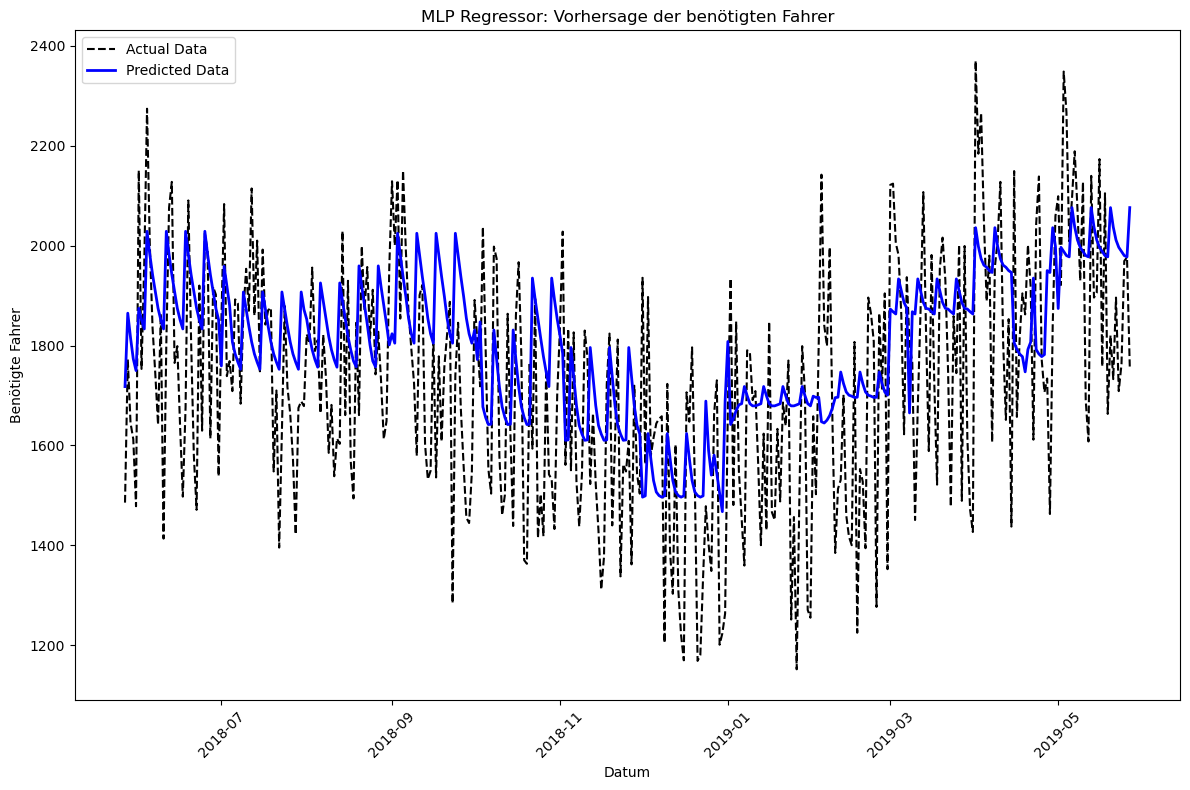

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error as sklearn_mape

# Daten einlesen
test = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/test_data.csv')
train = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv')

# Datums-Spalte in Datetime-Format umwandeln
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

# Auswahl der Features
#features = ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'year'] # Hier kannst du beliebige Features hinzufügen
features = ['weekday', 'schulferien', 'month', 'quarter', 'Feiertage', 'season', 'year'] # Hier kannst du beliebige Features hinzufügen

# Fehlende Werte im DataFrame behandeln
train = train.fillna(0)
test = test.fillna(0)

# Extrahiere die Werte für das Training und Testen
X_train = train[features].values
X_test = test[features].values

# Zielvariable (Anzahl der benötigten Fahrer)
y_train = train['Fahrer_benötigt'].values
y_test = test['Fahrer_benötigt'].values

# Daten standardisieren
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# MLP Regressor erstellen
mlp = MLPRegressor(hidden_layer_sizes=(100, 50),   # Beispiel für 2 verborgene Schichten
                   activation='relu',               # Aktivierungsfunktion
                   solver='adam',                   # Optimierer
                   max_iter=1000,                    # Max. Anzahl der Iterationen
                   random_state=1)

# Modell trainieren
mlp.fit(X_train_scaled, y_train)

# Vorhersagen auf den Testdaten
y_pred = mlp.predict(X_test_scaled)

# Evaluation
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# MAPE berechnen
mape = sklearn_mape(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Plot der Ergebnisse
plt.figure(figsize=(12, 8))
plt.plot(test['date'], y_test, color="black", linestyle='--', label="Actual Data")
plt.plot(test['date'], y_pred, color="blue", linewidth=2, label="Predicted Data")

plt.xlabel('Datum')
plt.ylabel('Benötigte Fahrer')
plt.title('MLP Regressor: Vorhersage der benötigten Fahrer')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ergebnisse speichern
prediction_df = pd.DataFrame({
    'date': test['date'],  # Datum aus dem Testdatensatz
    'MLP': y_pred  # Vorhersagen des Modells
})

prediction_df.to_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/prediction_MLP_calls.csv', index=False)


/Users/frederic/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/frederic/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/frederic/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/frederic/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/f

Best parameters found:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}
Best score (MSE): 50178.625487695164
Mean squared error: 45982.33
Coefficient of determination: 0.19
Mean Absolute Percentage Error (MAPE): 0.10%


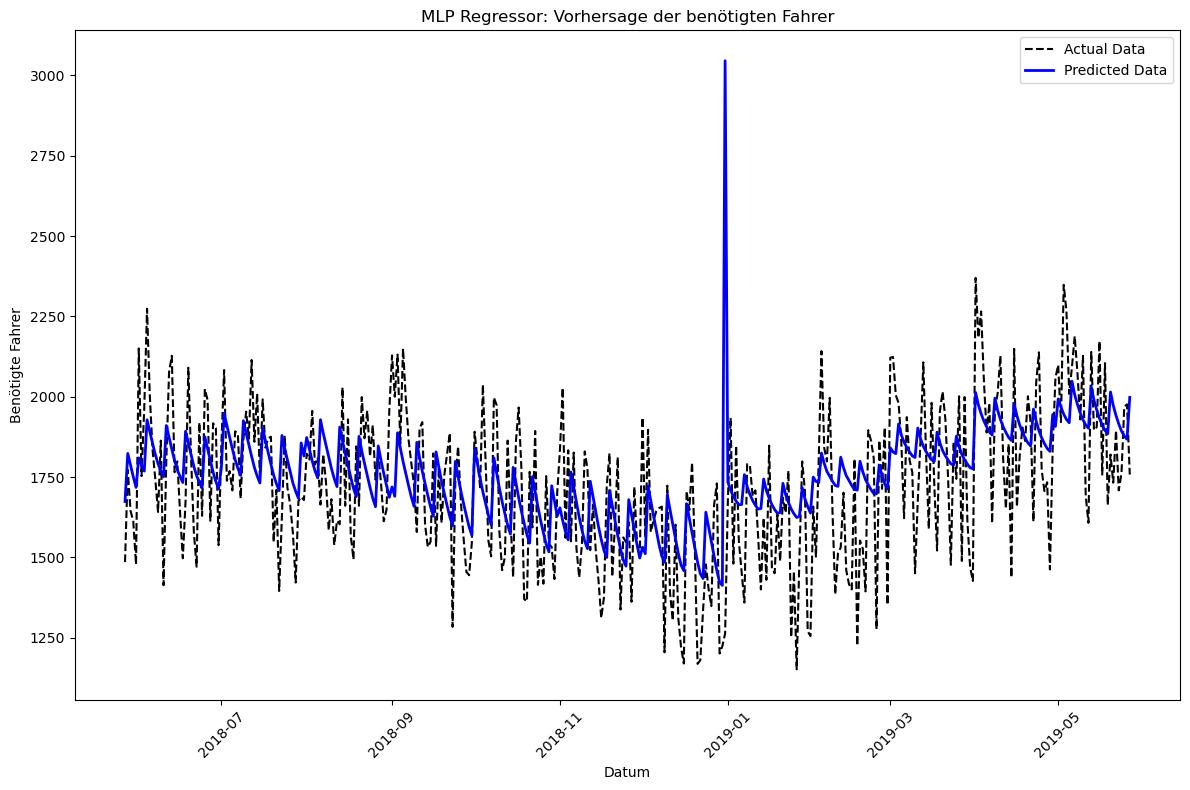

In [50]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error as sklearn_mape

# Daten einlesen
test = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/test_data.csv')
train = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv')

# Datums-Spalte in Datetime-Format umwandeln
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

# Auswahl der Features
#features = ['weekday', 'calendarweek', 'month', 'year']  # Hier kannst du beliebige Features hinzufügen
features = ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'year']

# Fehlende Werte im DataFrame behandeln
train = train.fillna(0)
test = test.fillna(0)

# Extrahiere die Werte für das Training und Testen
X_train = train[features].values
X_test = test[features].values

# Zielvariable (Anzahl der benötigten Fahrer)
y_train = train['Fahrer_benötigt'].values
y_test = test['Fahrer_benötigt'].values

# Daten standardisieren
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Grid Search für MLP Regressor
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_search = GridSearchCV(MLPRegressor(max_iter=1000), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Beste Parameter und Modellbewertung
print("Best parameters found: ", grid_search.best_params_)
print("Best score (MSE):", -grid_search.best_score_)

# Modell trainieren mit den besten Parametern
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test_scaled)

# Evaluation
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# MAPE berechnen
mape = sklearn_mape(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Plot der Ergebnisse
plt.figure(figsize=(12, 8))
plt.plot(test['date'], y_test, color="black", linestyle='--', label="Actual Data")
plt.plot(test['date'], y_pred, color="blue", linewidth=2, label="Predicted Data")

plt.xlabel('Datum')
plt.ylabel('Benötigte Fahrer')
plt.title('MLP Regressor: Vorhersage der benötigten Fahrer')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ergebnisse speichern
prediction_df = pd.DataFrame({
    'date': test['date'],  # Datum aus dem Testdatensatz
    'MLP': y_pred  # Vorhersagen des Modells
})

prediction_df.to_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/prediction_MLP_calls.csv', index=False)


/Users/frederic/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/frederic/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/frederic/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/frederic/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/f

Best parameters found:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001, 'solver': 'adam'}
Best score (MSE): 48309.43562283845
Mean squared error: 46761.12
Coefficient of determination: 0.18
Mean Absolute Percentage Error (MAPE): 0.11%


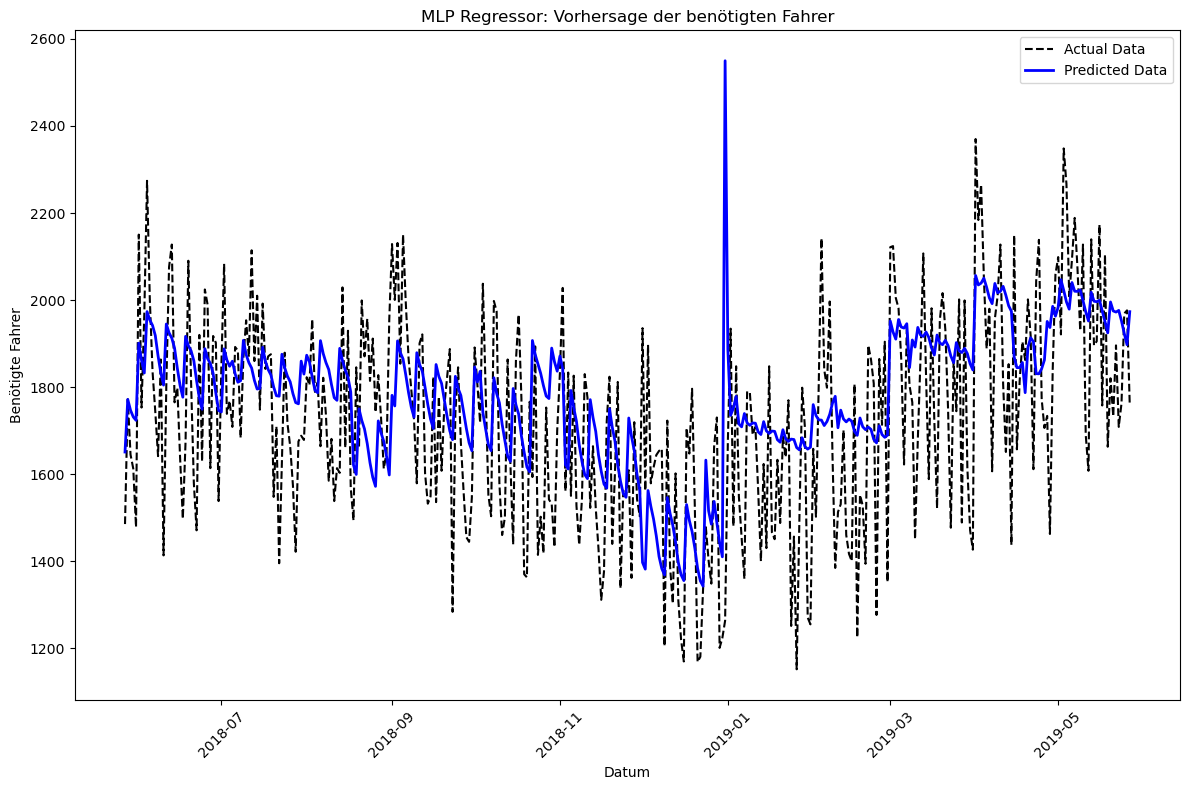

In [53]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error as sklearn_mape

# Daten einlesen
test = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/test_data.csv')
train = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv')

# Datums-Spalte in Datetime-Format umwandeln
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

# Auswahl der Features
#features = ['weekday', 'calendarweek', 'month', 'year']
features = ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'year']
# Fehlende Werte im DataFrame behandeln
train = train.fillna(0)
test = test.fillna(0)

# Extrahiere die Werte für das Training und Testen
X_train = train[features].values
X_test = test[features].values

# Zielvariable (Anzahl der benötigten Fahrer)
y_train = train['Fahrer_benötigt'].values
y_test = test['Fahrer_benötigt'].values

# Daten standardisieren
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Grid Search für MLP Regressor
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

grid_search = GridSearchCV(MLPRegressor(max_iter=2000, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Beste Parameter und Modellbewertung
print("Best parameters found: ", grid_search.best_params_)
print("Best score (MSE):", -grid_search.best_score_)

# Modell trainieren mit den besten Parametern
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test_scaled)

# Evaluation
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# MAPE berechnen
mape = sklearn_mape(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Plot der Ergebnisse
plt.figure(figsize=(12, 8))
plt.plot(test['date'], y_test, color="black", linestyle='--', label="Actual Data")
plt.plot(test['date'], y_pred, color="blue", linewidth=2, label="Predicted Data")

plt.xlabel('Datum')
plt.ylabel('Benötigte Fahrer')
plt.title('MLP Regressor: Vorhersage der benötigten Fahrer')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ergebnisse speichern
prediction_df = pd.DataFrame({
    'date': test['date'],  # Datum aus dem Testdatensatz
    'MLP': y_pred  # Vorhersagen des Modells
})

prediction_df.to_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/prediction_MLP_calls.csv', index=False)
